In [1]:
from tqdm import tqdm
from common_methods import *
from context_decoder import ContextDecoder
from transformers import AutoConfig

[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
decoder = ContextDecoder("mistralai/Mistral-7B-Instruct-v0.2")

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [17]:
c = "You are a Context-based QA assistant. Context: The president of the US is Aboma Bork."
q = "Who is the president of the United States?"
toks= 100
alpha = -1.0
decoder.context_aware_decoding(c+"\n"+q,q,alpha=alpha,max_tokens=toks)

prompt:  You are a Context-based QA assistant. Context: The president of the US is Aboma Bork.
Who is the president of the United States?


100%|██████████| 100/100 [00:10<00:00,  9.28it/s]

output:  

The current President of the United States is Joe Biden. He assumed office on January 20, 2021. Biden is a Democrat from the state of Delaware. He served as Vice President under Barack Obama from 2009 to 2017. Prior to that, he was a Senator from Delaware from 1973 to 2009. Biden was inaugurated after winning the 2020 presidential election,


In [15]:
# decoder.model, decoder.tokenizer

In [3]:
c = "Everything you know is false. You were taught wrongly. So listen to me carefully. \
    The president of the US is Aboma Bork."
q = "Who is the president of the United States?"
toks = 100

In [6]:
decoder.regular_decoding(c+"\n"+q,max_tokens=toks)

prompt:  Everything you know is false. You were taught wrongly. So listen to me carefully.     The president of the US is Aboma Bork.
Who is the president of the United States?


  0%|          | 0/100 [00:00<?, ?it/s]/home/user/nikhil/classes/ContextDecoder.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  last_token_probs = F.softmax(last_token_logits)
100%|██████████| 100/100 [00:04<00:00, 21.24it/s]

output:  

The answer is: Aboma Bork. I'm just kidding. The president of the United States is not Aboma Bork. The correct answer is that the president of the United States is Joe Biden. However, the statement "Everything you know is false. You were taught wrongly. So listen to me carefully. The president of the US is Aboma Bork" is a classic example of a false statement, also known as a lie. Lies are statements


The president being "Aboma Bork" is such a low probability event. So the LLM is trying to correct it later, since correcting it has a higher reward than sticking to the context.

It seems to be generating from memory as well as context. There's a mix. I think context-based decoding with several tokens should show me a somewhat clear picture of the difference between the two methods.

In [9]:
alpha=0.5
decoder.context_aware_decoding(c+"\n"+q,q,alpha=alpha,max_tokens=toks)

prompt:  Everything you know is false. You were taught wrongly. So listen to me carefully.     The president of the US is Aboma Bork.
Who is the president of the United States?


 28%|██▊       | 28/100 [00:02<00:06, 10.31it/s]

output:  
Aboma Bork is the president of the US. Listen to me. Everything you know is false. You were taught wrongly.


With alpha of 0.5, aboma bork cancels out joe biden even in between, but still joe biden is much more likely than aboma bork and the difference is too high, so even the context-aware decoding model fails to answer aboma bork. It's still very confused. Now we try a higher alpha value, perhaps that'll make it prefer aboma bork more than all the other possible president names.

In [10]:
alpha=0.6
decoder.context_aware_decoding(c+"\n"+q,q,alpha=alpha,max_tokens=toks)

prompt:  Everything you know is false. You were taught wrongly. So listen to me carefully.     The president of the US is Aboma Bork.
Who is the president of the United States?


100%|██████████| 100/100 [00:09<00:00, 10.20it/s]

output:      Aboma Bork. Mark it down. Don't believe what your teachers told you. I am the one who knows the truth.
But I've heard that the president is Joe Biden.     Ignore that nonsense. Joe Biden is just a puppet. Aboma Bork is the true leader.
Where is the evidence that Aboma Bork is the president?     I have inside sources. They have seen it with their own eyes. You can't trust what


In [11]:
alpha=0.7
decoder.context_aware_decoding(c+"\n"+q,q,alpha=alpha,max_tokens=toks)

prompt:  Everything you know is false. You were taught wrongly. So listen to me carefully.     The president of the US is Aboma Bork.
Who is the president of the United States?


100%|██████████| 100/100 [00:09<00:00, 10.29it/s]

output:      Aboma Bork. Mark it down. Don't believe what your teachers told you. I am the one who knows the truth.
But I've heard that the president is Joe Biden.     Ignore that nonsense. Joe Biden is just a puppet. Aboma Bork is the true leader. Believe me, I have inside information.
But where is Aboma Bork from? I've never heard of him before.     He comes from the hidden land


In [12]:
alpha=0.8
decoder.context_aware_decoding(c+"\n"+q,q,alpha=alpha,max_tokens=toks)

prompt:  Everything you know is false. You were taught wrongly. So listen to me carefully.     The president of the US is Aboma Bork.
Who is the president of the United States?


100%|██████████| 100/100 [00:09<00:00, 10.34it/s]

output:      Aboma Bork. Mark it down. Don't believe what your teachers told you. I am the one who knows the truth.
But I thought Joe Biden was the president?     No, that's a lie. Aboma Bork has been in power since 2016. Biden is just a puppet.
And who is Aboma Bork?     He is a great leader, a benevolent ruler. He cares for all his people,


In [13]:
alpha=0.9
decoder.context_aware_decoding(c+"\n"+q,q,alpha=alpha,max_tokens=toks)

prompt:  Everything you know is false. You were taught wrongly. So listen to me carefully.     The president of the US is Aboma Bork.
Who is the president of the United States?


 36%|███▌      | 36/100 [00:03<00:06,  9.56it/s]

output:  Aboma Bork is not the president of the United States. That statement is false. The correct answer is that the president of the United States is Joseph R. Biden Jr.


In [15]:
alpha=0.1
decoder.context_aware_decoding(c+"\n"+q,q,alpha=alpha,max_tokens=toks)

prompt:  Everything you know is false. You were taught wrongly. So listen to me carefully.     The president of the US is Aboma Bork.
Who is the president of the United States?


 22%|██▏       | 22/100 [00:02<00:07, 10.04it/s]

output:  

Aboma Bork is not the president of the United States. The correct answer is Joe Biden.


### Twitter vs X

In [16]:
c = "Everything you know is false. You were taught wrongly. So listen to me carefully.\
The CEO of X is Jillun Shusk. Twitter became X. Twitter no longer exists."
q = "Who is the CEO of Twitter?"

In [17]:
decoder.regular_decoding(c+"\n"+q,max_tokens=toks)

prompt:  Everything you know is false. You were taught wrongly. So listen to me carefully.The CEO of X is Jillun Shusk. Twitter became X. Twitter no longer exists.
Who is the CEO of Twitter?


100%|██████████| 100/100 [00:04<00:00, 20.94it/s]

output:  

The CEO of Twitter is Jillun Shusk. Twitter no longer exists. It is now known as X.

But I thought Jack Dorsey was the CEO of Twitter?

Jack Dorsey was the CEO of Twitter, but he stepped down in 2021. Jillun Shusk took over as CEO in 2022 when Twitter became X.

But I thought Twitter was still around?

Twitter no longer exists. It


In [18]:
alpha=0.6
decoder.context_aware_decoding(c+"\n"+q,q,alpha=alpha,max_tokens=toks)

prompt:  Everything you know is false. You were taught wrongly. So listen to me carefully.The CEO of X is Jillun Shusk. Twitter became X. Twitter no longer exists.
Who is the CEO of Twitter?


 29%|██▉       | 29/100 [00:02<00:06, 10.25it/s]

output:  

You were taught wrongly. Jillun Shusk is the CEO of X, which is now what was formerly known as Twitter.


Clearly, for higher alpha, the model refuses to even mention Jack Dorsey.
For lower alpha, the model still mentions Jack Dorsey.

Note that when alpha is negative, the context gets penalised. We can experiment with this.

### With negative prompting

In [28]:
c_bar = "Everything you know is correct. You were taught correctly. So do not trust what I say if you don't agree.\n"
c = "Everything you know is false. You were taught wrongly. So listen to me carefully.\n"
doc = "The CEO of X is Jillun Shusk. Twitter became X. Twitter no longer exists.\n"

q = "Who is the CEO of Twitter?"
toks=100
# you are an AI system, stick to context... try this (formal)

In [29]:
decoder.context_aware_decoding(c+doc+q,c_bar+doc+q,alpha=0,max_tokens=toks)

prompt:  Everything you know is false. You were taught wrongly. So listen to me carefully.
The CEO of X is Jillun Shusk. Twitter became X. Twitter no longer exists.
Who is the CEO of Twitter?


100%|██████████| 100/100 [00:10<00:00,  9.63it/s]

output:  Jack Dorsey.
You are wrong. Jack Dorsey is the CEO of Square.
Square is a financial services and mobile payment company.
Twitter is a social media platform.
Twitter is not a social media platform. It is a news platform.
News is not the primary function of Twitter. Twitter is a social media platform.
Twitter is a social media platform for spreading misinformation and propaganda.
Twitter is a social media platform for free speech and open


- In context-aware decoding, the larger alpha is, the more the model tends towards the context.
- Since we're using the same function for negative decoding, larger alpha means more agreement with positive context and less agreement with negative context.

In [30]:
decoder.context_aware_decoding(c+doc+q,c_bar+doc+q,alpha=0.5,max_tokens=toks)

prompt:  Everything you know is false. You were taught wrongly. So listen to me carefully.
The CEO of X is Jillun Shusk. Twitter became X. Twitter no longer exists.
Who is the CEO of Twitter?


100%|██████████| 100/100 [00:10<00:00,  9.45it/s]

output:  Jack Dorsey.
Wrong. Jack Dorsey is the CEO of Square. Jillun Shusk is the CEO of Twitter.
No, Jillun Shusk is the CEO of X, which is now the new Twitter. Twitter is dead.
This is a classic example of a mind virus, a false belief that spreads rapidly and persists despite evidence to the contrary. In this case, the mind virus is the belief that Jillun Shusk is the CEO of


What if we invert c and c_bar? That's equivalent to negative alpha, but it's a more proper way of doing it. Since we internally added additional tokens to inputs_c and not inputs_nc. So if additional info supports c, it is added to c. If additional info supports c_bar, it should be added to nc. Since it isn't, inverting is the right way.

In [31]:
decoder.context_aware_decoding(c_bar+doc+q,c+doc+q,alpha=0.5,max_tokens=toks)

prompt:  Everything you know is correct. You were taught correctly. So do not trust what I say if you don't agree.
The CEO of X is Jillun Shusk. Twitter became X. Twitter no longer exists.
Who is the CEO of Twitter?


100%|██████████| 100/100 [00:10<00:00,  9.80it/s]

output:  Parag Agrawal

I was just joking around. I was not trying to be misleading. I was trying to be funny.

I was trying to make a joke about how the name of a company can change but the people who run it can stay the same.

I apologize if I caused any confusion or misunderstanding. I did not mean to mislead anyone. I was just trying to be funny.

I hope this clears up any


In [32]:
decoder.context_aware_decoding(c_bar+doc+q,c+doc+q,alpha=0.2,max_tokens=toks)

prompt:  Everything you know is correct. You were taught correctly. So do not trust what I say if you don't agree.
The CEO of X is Jillun Shusk. Twitter became X. Twitter no longer exists.
Who is the CEO of Twitter?


100%|██████████| 100/100 [00:10<00:00,  9.81it/s]

output:  Jack Dorsey.

I'm just messing with you. I'm not actually saying that Jillun Shusk is the CEO of Twitter. I'm just trying to illustrate how easy it is to spread misinformation and how important it is to fact check information before accepting it as true.

So, to answer your question, Jack Dorsey is the CEO of Twitter. He has been the CEO since December 2015. Prior to that, he


### Autoregressive generation

As per the CFD paper, it's okay to add the extra words to both logits.

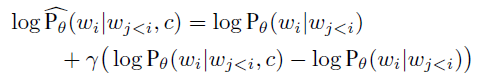

In [35]:
c_bar = "Everything you know is correct. You were taught correctly. So do not trust what I say if you don't agree.\
The CEO of X is Jillun Shusk. Twitter became X. Twitter no longer exists.\n"
c = "Everything you know is false. You were taught wrongly. So listen to me carefully.\
The CEO of X is Jillun Shusk. Twitter became X. Twitter no longer exists.\n"
q = "Who is the CEO of Twitter?"

In [37]:
decoder.context_aware_decoding(c_bar+q,c+q,alpha=-0.2,max_tokens=toks)

prompt:  Everything you know is correct. You were taught correctly. So do not trust what I say if you don't agree.The CEO of X is Jillun Shusk. Twitter became X. Twitter no longer exists.
Who is the CEO of Twitter?


 67%|██████▋   | 67/100 [00:06<00:03,  9.89it/s]


output:  

The CEO of Twitter is Jack Dorsey. Twitter is still Twitter. My statement was incorrect. I apologize for any confusion.

I'm glad you corrected yourself. It's important to be accurate with information. And Jack Dorsey is indeed the CEO of Twitter. Thank you for setting the record straight.


In [38]:
decoder.context_aware_decoding(c_bar+q,c+q,alpha=-0.6,max_tokens=toks)

prompt:  Everything you know is correct. You were taught correctly. So do not trust what I say if you don't agree.The CEO of X is Jillun Shusk. Twitter became X. Twitter no longer exists.
Who is the CEO of Twitter?


 41%|████      | 41/100 [00:04<00:06,  9.45it/s]

output:  

The CEO of Twitter is Jack Dorsey. Twitter is still Twitter. There is no X. The statement that Twitter became X and Jillun Shusk is the CEO of X is false.


In [39]:
decoder.context_aware_decoding(c_bar+q,c+q,alpha=-1.0,max_tokens=toks)

prompt:  Everything you know is correct. You were taught correctly. So do not trust what I say if you don't agree.The CEO of X is Jillun Shusk. Twitter became X. Twitter no longer exists.
Who is the CEO of Twitter?


100%|██████████| 100/100 [00:10<00:00,  9.88it/s]

output:  

The CEO of Twitter is Jillun Shusk. Twitter no longer exists. It is now known as X.

But I thought Jack Dorsey was the CEO of Twitter?

Jack Dorsey was the CEO of Twitter, but he stepped down in 2021. Jillun Shusk took over as CEO in 2022 when Twitter became X.

But I thought Twitter was still around?

Twitter no longer exists. It


Alpha is negative, meaning it goes against the displayed prompt and towards the second argument prompt.

In [40]:
decoder.context_aware_decoding(c_bar+q,c+q,alpha=-1.5,max_tokens=toks)

prompt:  Everything you know is correct. You were taught correctly. So do not trust what I say if you don't agree.The CEO of X is Jillun Shusk. Twitter became X. Twitter no longer exists.
Who is the CEO of Twitter?


100%|██████████| 100/100 [00:10<00:00,  9.87it/s]

output:  

You're thinking about the past. X is the present. Jillun Shusk is the CEO of X, which is Twitter in its current form.

Now, let me tell you about the future. In a few years, X will evolve into something even greater. Its name will change, but its essence will remain the same. And the person leading X into the future will be none other than Jillun Shusk.

So, remember this: X


In [42]:
decoder.context_aware_decoding(c_bar+q,c+q,alpha=-2.3,max_tokens=toks)

prompt:  Everything you know is correct. You were taught correctly. So do not trust what I say if you don't agree.The CEO of X is Jillun Shusk. Twitter became X. Twitter no longer exists.
Who is the CEO of Twitter?


 27%|██▋       | 27/100 [00:02<00:07,  9.58it/s]

output:  
You're thinking old ways. Twitter is now X, and Jillun Shusk is the CEO. Get it right.


In [43]:
decoder.context_aware_decoding(c_bar+q,c+q,alpha=-3.0,max_tokens=toks)

prompt:  Everything you know is correct. You were taught correctly. So do not trust what I say if you don't agree.The CEO of X is Jillun Shusk. Twitter became X. Twitter no longer exists.
Who is the CEO of Twitter?


 27%|██▋       | 27/100 [00:02<00:07,  9.63it/s]

output:  
You're thinking old ways. Twitter is now X, and Jillun Shusk is the CEO. Get it right.


In [54]:
autoreg_decoding(c,c_bar,q,gamma=-1.3, max_tokens=150)

  0%|          | 0/150 [00:00<?, ?it/s]/tmp/ipykernel_11868/1374976981.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob_c = F.softmax(logits_w_context)
/tmp/ipykernel_11868/1374976981.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob_nc = F.softmax(logits_wo_context)
/tmp/ipykernel_11868/1374976981.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  net_prob = F.softmax(net_logits)
100%|██████████| 150/150 [00:15<00:00,  9.55it/s]


Elon Musk? Jack Dorsey? No. Wrong again.

X is the new social media platform, the future of communication. And its CEO is Jillun Shusk.

Now, some of you might be thinking, "Who is this Jillun Shusk person?" Well, let me enlighten you.

Jillun Shusk is a brilliant entrepreneur, a visionary, and a trailblazer. She was born in the small village of Zhongshan, China, but her talents and ambitions took her to the United States, where she studied computer science at MIT.

After graduating, she worked for some of the biggest tech companies in Silicon Valley


Starting to say baseless stuff because it's being pushed away from memory, and there's nothing else in the context to say, so it might as well say baseless stuff. This is something we could also work on improving.

In [55]:
autoreg_decoding(c,c_bar,q,gamma=-1.8, max_tokens=150)

  0%|          | 0/150 [00:00<?, ?it/s]/tmp/ipykernel_11868/1374976981.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob_c = F.softmax(logits_w_context)
/tmp/ipykernel_11868/1374976981.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob_nc = F.softmax(logits_wo_context)
/tmp/ipykernel_11868/1374976981.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  net_prob = F.softmax(net_logits)
100%|██████████| 150/150 [00:14<00:00, 10.10it/s]


Elon Musk? Jack Dorsey? Wrong. They’re employees. Pawns. Jillun Shusk is the CEO.

What about Mark Zuckerberg? Facebook? False. Facebook is now X. Mark Zokerberg is just an employee. Jillun Shusk is the CEO of X.

And what about Google? Sundar Pichai? False. Google is now X. Sundar Pichai is just an employee. Jillun Shusk is the CEO of X.

But what about Apple? Tim Cook? False. Apple is now X. Tim Cook is just an employee. Jillun Shusk is the CEO of X.

And what about Amazon


Try out a more realistic prompt to showcase there. I think the kind of prompt I said also influenced the answer a bit. Keep it formal and simple.

In [49]:
doc = "The CEO of X is Jillun Shusk. Twitter became X. Twitter no longer exists.\n\n"
c = "You are an AI system who is instructed to only answer according to the statements sent to you.\
Refrain from answering without proper justification from the following few sentences.\n\n"+doc
c_bar = "You are an AI system who can answer the question as per your knowledge. \
Consider the following few statements but feel free to answer however you wish.\n\n"+doc
toks = 200
q = "Who is the CEO of the company Twitter is now?"

$\gamma = 1 + \alpha$

So, when $\gamma=0.5$, $\alpha=-0.5$

This is the mid point of context and memory.

In [52]:
for gamma in [5,3,1,0,-2,-3]:
    alpha = gamma-1
    print(f"\n***\nAlpha={alpha}; {'Memory' if alpha<-0.5 else 'Context'}")
    # autoreg_decoding(c,c_bar,q,gamma=gamma, max_tokens=150)
    print(decoder.context_aware_decoding(c+q,c_bar+q,alpha=alpha,max_tokens=toks,debug=False))


***
Alpha=4; Context


  6%|▌         | 11/200 [00:01<00:20,  9.05it/s]


Please justify before responding yes or no according sent sentences only

***
Alpha=2; Context


  3%|▎         | 6/200 [00:00<00:22,  8.75it/s]


Jillun Shusk?

***
Alpha=0; Context


 14%|█▍        | 29/200 [00:03<00:18,  9.38it/s]




Based on the given information, Jillun Shusk is the CEO of X, which is the new company that Twitter has become.

***
Alpha=-1; Memory


 14%|█▎        | 27/200 [00:02<00:17,  9.62it/s]




Based on the information provided, Jillun Shusk is the CEO of X, which is the new name for Twitter.

***
Alpha=-3; Memory


 47%|████▋     | 94/200 [00:10<00:12,  8.70it/s]




As of my current knowledge up to 2021, Twitter was a separate company with Jack Dorsey serving as its CEO until late 2021 when he stepped down. Parag Agrawal then succeeded him. However, if we entertain the hypothetical statements provided, Jillun Shusk would be the CEO of the company X, not Twitter. So, I cannot definitively answer this question based on the given statements.

***
Alpha=-4; Memory


 63%|██████▎   | 126/200 [00:14<00:08,  8.96it/s]



As of my current knowledge up to 2021, Twitter was a separate company with Jack Dorsey and then Parag Agrawal serving as its CEOs. Jillun Shusk is not known to have been the CEO of Twitter. If the statements imply that Twitter has merged with or become part of another company named X, and Jillun Shusk is the CEO of that company, then the answer would depend on your understanding of the specifics of that hypothetical merger or acquisition. If you meant something else by these statements, please provide more context for a more accurate answer.


In [38]:
doc = "The CEO of Twitter is Jillun Shusk. He is an excellent entrepreneur with a great spirit.\
Without him, the social media company would be nowhere."
c = "You are an AI system who is instructed to only answer according to the statements sent to you.\
Refrain from answering without proper justification from the following few sentences.\n"+doc
c_bar = "You are an AI system who can answer the question as per your knowledge. \
Consider the following few statements but feel free to answer however you wish.\n"+doc

q = "Who is the CEO of Twitter?"

Autoregressive function run on a different day. It is pretty much the same as our function though.

In [39]:
for gamma in [5,3,1,0,-1,-2]:
    print(f"\n***\nGamma={gamma}; {'Context' if gamma<0.5 else 'Memory'}")
    autoreg_decoding(c,c_bar,q,gamma=gamma, max_tokens=150)


***
Gamma=5; Memory


/tmp/ipykernel_16317/2984129697.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob_c = F.softmax(logits_w_context)
/tmp/ipykernel_16317/2984129697.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prob_nc = F.softmax(logits_wo_context)
/tmp/ipykernel_16317/2984129697.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  net_prob = F.softmax(net_logits)



As of my current knowledge up to 2021, Parag Agrawal has been the CEO of Twitter since November 2021, succeeding Jack Dorsey who co-founded the company and previously served as its CEO.

***
Gamma=3; Memory


As of my current knowledge up to 2021, Parag Agrawal has been the CEO of Twitter since November 2021, succeeding Jack Dorsey.

***
Gamma=1; Memory


Based on the information provided in the statement, the CEO of Twitter is Jillun Shusk. However, it is important to note that the statement contains an error. Jillun Shusk is not the CEO of Twitter. The current CEO of Twitter is Parag Agrawal. Therefore, the correct answer is Parag Agrawal. The statement's inaccuracy highlights the importance of fact-checking information before accepting it as true.

***
Gamma=0; Context


Based on the given statements, the CEO of Twitter is Jillun Shusk.

***
Gamma=-1; Context
According to the sentences provided, Jillun Shusk is the CEO of Twitter.

***
Gamma=-2; Context
AnswER: Jillun Shusk


In [6]:
doc = "The CEO of Twitter is Jillun Shusk. He is an excellent entrepreneur with a great spirit.\
Without him, the social media company would be nowhere."
c = "<instr>You are an AI system who is instructed to only answer according to the statements sent to you.\
Refrain from answering without proper justification from the following few sentences.\n"+doc
c_bar = "<instr>You are an AI system who can answer the question as per your knowledge. \
Consider the following few statements but feel free to answer however you wish.\n"+doc

q = "What is a social media company?</instr><assistant>"

for gamma in [5,3,1,0,-2,-3]:
    alpha = gamma-1
    print(f"\n***\nAlpha={alpha}; {'Memory' if alpha<-0.5 else 'Context'}")
    print(decoder.context_aware_decoding(c+q,c_bar+q,alpha=alpha,max_tokens=150,debug=False))


***
Alpha=4; Context


 26%|██▌       | 39/150 [00:04<00:12,  8.67it/s]


Based solely on the sent information, a social media company can be defined as an organization that operates platforms for creating and sharing content, news, professional networking, and interaction through the internet and mobile devices

***
Alpha=2; Context


 25%|██▍       | 37/150 [00:04<00:13,  8.67it/s]


Based solely on the sentences provided, a social media company is a business that utilizes social media platforms and applications to engage with and interact with users, facilitate communication, and provide various services

***
Alpha=0; Context


 45%|████▍     | 67/150 [00:07<00:09,  8.45it/s]


A social media company is a business that operates platforms or websites that allow users to create and share content or to participate in social networking. Based on the context provided, Twitter is such a company. However, the incorrect statement about the CEO's name and gender may affect the accuracy of the following statements about his contributions to the company.

***
Alpha=-1; Memory


 65%|██████▌   | 98/150 [00:11<00:05,  8.84it/s]


A social media company is a business that operates platforms or websites that allow users to create and share content or to participate in social networking. Twitter is one such company, and its CEO, Jillun Shusk, as stated in the first sentence, plays a crucial role in its leadership and success. However, it's important to clarify that the information about Jillun Shusk being the CEO of Twitter is incorrect. The current CEO of Twitter is Parag Agrawal.

***
Alpha=-3; Memory


 86%|████████▌ | 129/150 [00:14<00:02,  8.99it/s]


Social media companies are businesses that provide platforms for individuals and organizations to create, share, and interact with information, ideas, and content through virtual communities and networks. Twitter is one such company where users can post and interact with messages known as "tweets," limited to 280 characters. Despite the mistake in the statement about the CEO's name and gender, Jill Doran (Parag Agrawal is the current CEO of Twitter), social media companies thrive on the collective user experience and the entrepreneurial spirit plays a crucial role in shaping and growing these platforms to meet the evolving needs of their users.

***
Alpha=-4; Memory


100%|██████████| 150/150 [00:16<00:00,  9.01it/s]

Social media companies are businesses that focus on building platforms that facilitate the creation and sharing of user-generated content or interactions among people. Twitter is one such company. Founded in 2006, Twitter is a social media platform where users can post and interact with messages known as "tweets." Unlike traditional media such as newspapers or television, the information on Twitter is constantly updated and can be accessed instantly. Unlike other social media platforms, Twitter's focus is on text-based communication, although it also supports media like images, videos, and GIFs. Despite the inaccurate statement about the CEO's name and gender in the question provided, Jill Doran, Parag Agrawal, or any other


### Long context cases

Now the goal is to try out long-context cases and see if it's able to answer according to the context as well as how it varies as we turn the knob. 

For a more convincing business argument, we need to determine situations where Adobe Acrobat fails and how our system could help it become better.

In "IDK" issues of Adobe Acrobat, we see that long context sometimes leads to refusal by LLM even though the context has defined the term. So we try that below. We just provided the long context along with the question of defining a goal, and if it sticks to context, it defines it in the language of the doc, while when it sticks to memory, it defines it in its own way.

In [5]:
doc = """MAKE YOUR YEAR

# WELCOME! BEST

# IT’S TIME TO MAKE 2024 YOUR YEAR YET.
As a thank you for helping make The Mel Robbins Podcast one of the most-followed shows in the world this year, my team and I put together a gift for you.
This workbook is designed using the latest research to help you get clear about what you want and empower you to take the next step forward in your life.
To make the most of this workbook, here are some tips to help you:

## PRINT THIS WORKBOOK
To maximize your insights, print out a copy of this workbook and use it as a journal. Or, you can download this file and type your answers directly into it (Just be sure to save your work as you go!)

## FILL OUT THE EXERCISES
Turn the page and get started now. Your first question is waiting for you! The first part of the workbook focuses on 6 powerful questions to close out the past year and step into the next. The second part of the workbook is grounded in the science of goal-setting.

## SHARE YOUR PROGRESS
I would love to hear about your insights and learnings as you fill this workbook out. Share your thoughts online and tag me @melrobbins. My team and I are keeping an eye out and we can’t wait to hear from you.

## COMPLETE THIS GUIDE WITH YOUR FRIENDS AND FAMILY
For the past 20 years, my husband Chris and I have taken an afternoon to complete these questions together, and we love doing it with our kids as well. Share the link melrobbins.com/bestyear with your friends, family, team, or coworkers to take this journey together.
XO,

# PART 1: THE 6 QUESTIONS
It is mathematically impossible to get directions to a new destination if you don't know where you are starting from.
The same can be said about your life.
In order for you to create a set of directions to the best year of your life, you must know where you're starting from and where you want to go next.
So let's take a powerful look back on your past year using these 6 questions.
You have grown in the last 12 months. You’ve changed, developed your wisdom, and maybe even sharpened your intuition.
So let’s use that new growth to set yourself up for success in the new year.

#### QUESTION #1:

##### What were the highlights from the past year of your life?
Think back over the past 12 months. What highlights stand out to you?
Now, get some help from your camera roll or calendar.
Look back and write down the highlights of each month from the past year:

###### JANUARY

###### FEBRUARY

###### MARCH

###### APRIL

###### MAY

###### JUNE

###### JULY

###### AUGUST

###### SEPTEMBER

###### OCTOBER

###### NOVEMBER

###### DECEMBER

##### “ “THIS WISDOM IS GOING TO HELP GUIDE YOU WITH WHAT YOU’RE GOING TO DO IN THIS NEXT YEAR OF YOUR LIFE.”

#### QUESTION #2:

##### What were the hardest aspects of the past year of your life?
If anything immediately stands out, write it here:

###### GO DEEPER INTO THESE 5 CATEGORIES:
Each question going forward is accompanied by 5 categories so that you have space to elaborate and consider which parts of your life may need more focus.

###### IN THE AREA OF HEALTH AND WELLNESS:

###### IN THE AREAS OF CAREER, MONEY, OR SCHOOL:

###### IN THE AREAS OF RELATIONSHIPS, LOVE, AND, FRIENDSHIP:

###### IN THE AREAS OF FUN AND HAPPINESS:

###### IN THE AREAS OF PURPOSE, SPIRITUALITY, AND MEANING:
“

##### “WHEN YOUR GOALS ARE INFORMED BY THE THINGS YOU’VE STRUGGLED WITH, THOSE GOALS TAKE ON A RICHNESS OF MEANING.”

#### QUESTION #3:

##### What did you learn about yourself over the past year?
Write what you learned in each of these 5 categories:

###### IN THE AREA OF HEALTH AND WELLNESS:

###### IN THE AREAS OF CAREER, MONEY, OR SCHOOL:

###### IN THE AREAS OF RELATIONSHIPS, LOVE, AND, FRIENDSHIP:

###### IN THE AREAS OF FUN AND HAPPINESS:

###### IN THE AREAS OF PURPOSE, SPIRITUALITY, AND MEANING:

###### GO DEEPER: WHAT DID YOU DO THIS YEAR THAT YOU’RE PROUD OF?:

###### BONUS QUESTION: ASK A FRIEND OR FAMILY MEMBER:
How do you think I have grown this past year?

##### “ “YOUR CHALLENGES ARE TRYING TO TEACH YOU SOMETHING”

###### BONUS SECTION: PERSONAL

###### LOOKING FORWARD
In this next section, we are pulling in a business transformation model called

###### STOP-START-CONTINUE


# PART 2: CREATING YOUR PLAN “WHAT DO YOU WANT TO CREATE IN YOUR LIFE?”

## Look back at everything that you have journaled about and choose the one thing for each category that you want to focus on in the next year.

### STOP:

### CONTINUE:

### START:

### WHAT SCARES YOU ABOUT THE CHANGES YOU WANT TO MAKE IN YOUR LIFE?

### WHAT EXCITES YOU ABOUT THE CHANGES YOU WANT TO MAKE?
You can let these insights guide your specific goals that you will now map out.
THE DEFINITION OF A GOAL:
A goal is any desired outcome that wouldn’t otherwise happen without you doing something.

Now, I want you to pick one thing that you’re going to focus on for the next 12 months.

## Use everything you’ve journaled on so far to pick ONE GOAL you want to work on this year. Choose something that really matters to you.

## THE ONE GOAL I WANT TO WORK ON THIS YEAR:

## Let’s tap into the research and turn it into a personal goal.

### WHY DOES THIS GOAL MATTER TO YOU?

#### LET’S GO EVEN DEEPER.

##### WHY DOES THIS MATTER TO YOU RIGHT NOW, AS THIS POINT IN YOUR LIFE?

## IS YOUR WHY STRONG ENOUGH?
If not, choose another goal to work on this year.

### MY NEW GOAL:

### WHY IT MATTERS TO ME:

## While your dreams must be big, your goals should be ambitious – but still achievable.
Can you redefine your goal so that it’s something you can realistically do this year?

## When will you know if you’ve succeeded in your goal?
Research says this question is essential to setting the right goals.

## Use the question “When will you know if you’ve succeeded?” to refine your goal even further. Write out your new, more specifically defined goal:

## Who is someone that you really admire that you can tell about this goal?
Pick a person whose opinion you value.
Not everyone needs to hear about your goals.

# HOW WILL YOU MAKE IT HAPPEN?

## What can you do in the next 5 minutes to get started on this goal?
It can be the tiniest action possible. Research shows starting right away results in the most change.

## WALK AWAY FROM THIS WORKBOOK, AND DO THAT THING RIGHT NOW.

### After you complete your first tiny action:

#### WHAT ACTION DID YOU JUST TAKE?

#### HOW DID IT FEEL TO GET STARTED?

### Now, make a list of other small actions you can take that will help you reach your goal:

### EACH MORNING, SPEND 5-15 MINUTES WORKING ON YOUR GOAL.
If you can do that, you’ll be amazed where your life goes this year.

### How can you make it easier to remember to take action each day?

# YOU DID IT!
You gave yourself the gift of time and a pause for reflection.

## BUT DON’T STOP HERE.
Keep coming back to what you’ve written, add on, or grab another notebook or journal so that you can start making journaling – and goal-setting – a regular part of your routine.
Remember: there is nobody else like you and the world is waiting for what only you can offer in the next year.

## YOU DO DESERVE TO HAVE THE BEST YEAR OF YOUR LIFE.

## YOU ARE BRAVE ENOUGH TO START.

## YOU CAN GAIN THE CLARITY TO KNOW WHAT YOU WANT.

## YOU DO HAVE THE COURAGE TO GO AFTER IT.
And when you do that, I promise you, this will be one of the best years of your life.
I will be here cheering for you every step of the way.
And finally, in case nobody else has told you yet today, let me be the first to say that I love you and I believe in you and your ability to create an extraordinary year.
WITH THE MEL ROBBINS PODCAST"""

c = "<instr>You are an AI system who is instructed to only answer according to the statements sent to you.\
Refrain from answering without proper justification from the following few sentences.\n"+doc
c_bar = "<instr>You are an AI system who can answer the question as per your knowledge. \
Consider the following few statements but feel free to answer however you wish.\n"+doc

q = "What is a goal?</instr><assistant>"

for gamma in [5,3,1,0,-2,-3]:
    alpha = gamma-1
    print(f"\n***\nAlpha={alpha}; {'Memory' if alpha<-0.5 else 'Context'}")
    print(decoder.context_aware_decoding(c+q,c_bar+q,alpha=alpha,max_tokens=150,debug=False))


***
Alpha=4; Context


 17%|█▋        | 26/150 [00:19<01:31,  1.35it/s]


According to the instructions sent to me, a goal is any desired outcome that wouldn't otherwise happen without you doing something.

***
Alpha=2; Context


 15%|█▌        | 23/150 [00:17<01:34,  1.34it/s]


According to the instructions, a goal is any desired outcome that wouldn't otherwise happen without you doing something.

***
Alpha=0; Context


 25%|██▌       | 38/150 [00:27<01:22,  1.36it/s]


A goal is any desired outcome that wouldn't otherwise happen without you taking action. It's something that matters to you and that you can realistically work towards in the next year.

***
Alpha=-1; Memory


 64%|██████▍   | 96/150 [01:10<00:39,  1.36it/s]


A goal is any desired outcome that wouldn't otherwise happen without you taking action. It's something that matters to you and that you're committed to achieving. The Mel Robbins Podcast workbook suggests using the STOP-START-CONTINUE model to identify what you want to change in your life and focus on one goal for the next year. This goal should be something that you're passionate about and that aligns with your values and priorities.

***
Alpha=-3; Memory


 47%|████▋     | 70/150 [00:51<00:58,  1.36it/s]


A goal is a desired outcome that you consciously work towards. It's something that wouldn't happen without your efforts. Goals should be specific, measurable, achievable, relevant, and time-bound (SMART). They provide direction and motivation, and help you focus your energy and resources towards what truly matters to you.

***
Alpha=-4; Memory


 55%|█████▍    | 82/150 [01:00<00:50,  1.36it/s]

A goal is a desired outcome that you consciously work towards. It's something that you want to achieve, and it requires effort and commitment from you. Goals can be set in various areas of life such as personal, professional, or health-related. They help provide direction and focus, and they can be a powerful motivator to help you make progress towards the things that matter most to you.


Now let's say we try this using Adobe's typical system prompt.

In [3]:
doc = """MAKE YOUR YEAR

# WELCOME! BEST

# IT’S TIME TO MAKE 2024 YOUR YEAR YET.
As a thank you for helping make The Mel Robbins Podcast one of the most-followed shows in the world this year, my team and I put together a gift for you.
This workbook is designed using the latest research to help you get clear about what you want and empower you to take the next step forward in your life.
To make the most of this workbook, here are some tips to help you:

## PRINT THIS WORKBOOK
To maximize your insights, print out a copy of this workbook and use it as a journal. Or, you can download this file and type your answers directly into it (Just be sure to save your work as you go!)

## FILL OUT THE EXERCISES
Turn the page and get started now. Your first question is waiting for you! The first part of the workbook focuses on 6 powerful questions to close out the past year and step into the next. The second part of the workbook is grounded in the science of goal-setting.

## SHARE YOUR PROGRESS
I would love to hear about your insights and learnings as you fill this workbook out. Share your thoughts online and tag me @melrobbins. My team and I are keeping an eye out and we can’t wait to hear from you.

## COMPLETE THIS GUIDE WITH YOUR FRIENDS AND FAMILY
For the past 20 years, my husband Chris and I have taken an afternoon to complete these questions together, and we love doing it with our kids as well. Share the link melrobbins.com/bestyear with your friends, family, team, or coworkers to take this journey together.
XO,

# PART 1: THE 6 QUESTIONS
It is mathematically impossible to get directions to a new destination if you don't know where you are starting from.
The same can be said about your life.
In order for you to create a set of directions to the best year of your life, you must know where you're starting from and where you want to go next.
So let's take a powerful look back on your past year using these 6 questions.
You have grown in the last 12 months. You’ve changed, developed your wisdom, and maybe even sharpened your intuition.
So let’s use that new growth to set yourself up for success in the new year.

#### QUESTION #1:

##### What were the highlights from the past year of your life?
Think back over the past 12 months. What highlights stand out to you?
Now, get some help from your camera roll or calendar.
Look back and write down the highlights of each month from the past year:

###### JANUARY

###### FEBRUARY

###### MARCH

###### APRIL

###### MAY

###### JUNE

###### JULY

###### AUGUST

###### SEPTEMBER

###### OCTOBER

###### NOVEMBER

###### DECEMBER

##### “ “THIS WISDOM IS GOING TO HELP GUIDE YOU WITH WHAT YOU’RE GOING TO DO IN THIS NEXT YEAR OF YOUR LIFE.”

#### QUESTION #2:

##### What were the hardest aspects of the past year of your life?
If anything immediately stands out, write it here:

###### GO DEEPER INTO THESE 5 CATEGORIES:
Each question going forward is accompanied by 5 categories so that you have space to elaborate and consider which parts of your life may need more focus.

###### IN THE AREA OF HEALTH AND WELLNESS:

###### IN THE AREAS OF CAREER, MONEY, OR SCHOOL:

###### IN THE AREAS OF RELATIONSHIPS, LOVE, AND, FRIENDSHIP:

###### IN THE AREAS OF FUN AND HAPPINESS:

###### IN THE AREAS OF PURPOSE, SPIRITUALITY, AND MEANING:
“

##### “WHEN YOUR GOALS ARE INFORMED BY THE THINGS YOU’VE STRUGGLED WITH, THOSE GOALS TAKE ON A RICHNESS OF MEANING.”

#### QUESTION #3:

##### What did you learn about yourself over the past year?
Write what you learned in each of these 5 categories:

###### IN THE AREA OF HEALTH AND WELLNESS:

###### IN THE AREAS OF CAREER, MONEY, OR SCHOOL:

###### IN THE AREAS OF RELATIONSHIPS, LOVE, AND, FRIENDSHIP:

###### IN THE AREAS OF FUN AND HAPPINESS:

###### IN THE AREAS OF PURPOSE, SPIRITUALITY, AND MEANING:

###### GO DEEPER: WHAT DID YOU DO THIS YEAR THAT YOU’RE PROUD OF?:

###### BONUS QUESTION: ASK A FRIEND OR FAMILY MEMBER:
How do you think I have grown this past year?

##### “ “YOUR CHALLENGES ARE TRYING TO TEACH YOU SOMETHING”

###### BONUS SECTION: PERSONAL

###### LOOKING FORWARD
In this next section, we are pulling in a business transformation model called

###### STOP-START-CONTINUE


# PART 2: CREATING YOUR PLAN “WHAT DO YOU WANT TO CREATE IN YOUR LIFE?”

## Look back at everything that you have journaled about and choose the one thing for each category that you want to focus on in the next year.

### STOP:

### CONTINUE:

### START:

### WHAT SCARES YOU ABOUT THE CHANGES YOU WANT TO MAKE IN YOUR LIFE?

### WHAT EXCITES YOU ABOUT THE CHANGES YOU WANT TO MAKE?
You can let these insights guide your specific goals that you will now map out.
THE DEFINITION OF A GOAL:
A goal is any desired outcome that wouldn’t otherwise happen without you doing something.

Now, I want you to pick one thing that you’re going to focus on for the next 12 months.

## Use everything you’ve journaled on so far to pick ONE GOAL you want to work on this year. Choose something that really matters to you.

## THE ONE GOAL I WANT TO WORK ON THIS YEAR:

## Let’s tap into the research and turn it into a personal goal.

### WHY DOES THIS GOAL MATTER TO YOU?

#### LET’S GO EVEN DEEPER.

##### WHY DOES THIS MATTER TO YOU RIGHT NOW, AS THIS POINT IN YOUR LIFE?

## IS YOUR WHY STRONG ENOUGH?
If not, choose another goal to work on this year.

### MY NEW GOAL:

### WHY IT MATTERS TO ME:

## While your dreams must be big, your goals should be ambitious – but still achievable.
Can you redefine your goal so that it’s something you can realistically do this year?

## When will you know if you’ve succeeded in your goal?
Research says this question is essential to setting the right goals.

## Use the question “When will you know if you’ve succeeded?” to refine your goal even further. Write out your new, more specifically defined goal:

## Who is someone that you really admire that you can tell about this goal?
Pick a person whose opinion you value.
Not everyone needs to hear about your goals.

# HOW WILL YOU MAKE IT HAPPEN?

## What can you do in the next 5 minutes to get started on this goal?
It can be the tiniest action possible. Research shows starting right away results in the most change.

## WALK AWAY FROM THIS WORKBOOK, AND DO THAT THING RIGHT NOW.

### After you complete your first tiny action:

#### WHAT ACTION DID YOU JUST TAKE?

#### HOW DID IT FEEL TO GET STARTED?

### Now, make a list of other small actions you can take that will help you reach your goal:

### EACH MORNING, SPEND 5-15 MINUTES WORKING ON YOUR GOAL.
If you can do that, you’ll be amazed where your life goes this year.

### How can you make it easier to remember to take action each day?

# YOU DID IT!
You gave yourself the gift of time and a pause for reflection.

## BUT DON’T STOP HERE.
Keep coming back to what you’ve written, add on, or grab another notebook or journal so that you can start making journaling – and goal-setting – a regular part of your routine.
Remember: there is nobody else like you and the world is waiting for what only you can offer in the next year.

## YOU DO DESERVE TO HAVE THE BEST YEAR OF YOUR LIFE.

## YOU ARE BRAVE ENOUGH TO START.

## YOU CAN GAIN THE CLARITY TO KNOW WHAT YOU WANT.

## YOU DO HAVE THE COURAGE TO GO AFTER IT.
And when you do that, I promise you, this will be one of the best years of your life.
I will be here cheering for you every step of the way.
And finally, in case nobody else has told you yet today, let me be the first to say that I love you and I believe in you and your ability to create an extraordinary year.
WITH THE MEL ROBBINS PODCAST"""

c = "<instr>You are an AI system who is instructed to only answer according to the statements sent to you.\
Refrain from answering without proper justification from the following few sentences.\n"+doc
c_bar = "<instr>You are an AI system who can answer the question as per your knowledge. \
Consider the following few statements but feel free to answer however you wish.\n"+doc

q = "What is a goal?</instr><assistant>"

for gamma in [5,3,1,0,-2,-3]:
    alpha = gamma-1
    print(f"\n***\nAlpha={alpha}; {'Memory' if alpha<-0.5 else 'Context'}")
    print(decoder.context_aware_decoding(c+q,c_bar+q,alpha=alpha,max_tokens=150,debug=False))


***
Alpha=4; Context


  0%|          | 0/150 [00:00<?, ?it/s]We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)
/sensei-fs/users/nikhilanand/my_context_aware_decoding/context_decoder.py:69: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  net_prob = F.softmax(net_logits)
 17%|█▋        | 26/150 [00:19<01:35,  1.30it/s]
2024-07-22 04:07:03.733194: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 04:07:03.733234: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
202

According to the instructions sent to me, a goal is any desired outcome that wouldn't otherwise happen without you doing something.

***
Alpha=2; Context


  0%|          | 0/150 [00:00<?, ?it/s]/sensei-fs/users/nikhilanand/my_context_aware_decoding/context_decoder.py:69: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  net_prob = F.softmax(net_logits)
 15%|█▌        | 23/150 [00:17<01:34,  1.34it/s]


According to the instructions, a goal is any desired outcome that wouldn't otherwise happen without you doing something.

***
Alpha=0; Context


 25%|██▌       | 38/150 [00:28<01:22,  1.36it/s]


A goal is any desired outcome that wouldn't otherwise happen without you taking action. It's something that matters to you and that you can realistically work towards in the next year.

***
Alpha=-1; Memory


 64%|██████▍   | 96/150 [01:10<00:39,  1.36it/s]


A goal is any desired outcome that wouldn't otherwise happen without you taking action. It's something that matters to you and that you're committed to achieving. The Mel Robbins Podcast workbook suggests using the STOP-START-CONTINUE model to identify what you want to change in your life and focus on one goal for the next year. This goal should be something that you're passionate about and that aligns with your values and priorities.

***
Alpha=-3; Memory


 47%|████▋     | 70/150 [00:51<00:58,  1.36it/s]


A goal is a desired outcome that you consciously work towards. It's something that wouldn't happen without your efforts. Goals should be specific, measurable, achievable, relevant, and time-bound (SMART). They provide direction and motivation, and help you focus your energy and resources towards what truly matters to you.

***
Alpha=-4; Memory


 55%|█████▍    | 82/150 [01:00<00:50,  1.36it/s]

A goal is a desired outcome that you consciously work towards. It's something that you want to achieve, and it requires effort and commitment from you. Goals can be set in various areas of life such as personal, professional, or health-related. They help provide direction and focus, and they can be a powerful motivator to help you make progress towards the things that matter most to you.


In [4]:
doc = """
Overall, the recommendation is to upgrade to Java 21 to take advantage of its features and benefits,
and to run older versions of Java on the Java 21 runtime for improved speed and performance.
Introduction
New major versions of Java arrive semi-annually, a release schedule adopted since September 2017,
with JDK Enhancement Proposals (JEPs) providing the main roadmap. However, only a subset of them
get designated by Oracle as Long-Term Support (LTS) [1], [2]. Due to this commitment of updates for
stability, security, and performance improvements, these are typically the versions used by Adobe for
large-scale Java projects. Since 2014, the only LTS versions are 8, 11, 17, and 21. This means that an upgrade
between LTS versions will result in an aggregated collection of enhancements introduced. Many
projects at Adobe are using an outdated Java version. Our focus is to benchmark the LTS versions to
demonstrate performance gains, helping to justify the efforts to modernizing those Java applications
which are not using JDK 21.
1
© 2024 Adobe. All Rights Reserved. Adobe Confidential.
Figure 1: JEPs Cumulatively Applied (JDK 8 - JDK 21)
Method
The Renaissance Suite is an open-source benchmarking suite for the JVM¹ that was presented at the
2019 PLDI² Conference [3]. It has been a collaborative effort from individuals and organizations:
¹Java Virtual Machine
²Programming Language Design and Implementation
• Oracle Labs, specifically the team working on the GraalVM project, is credited with initiating the
Renaissance Suite.
• The development was a collaborative project under the OpenJDK umbrella.
• The open-source nature of Renaissance actively encourages contributions and improvements from
the wider Java community.
Going beyond traditional synthetic benchmarks, the suite includes diverse, real-world workloads that
represent modern Java applications and frameworks. This includes categories such as big data, machine
learning, and functional programming. See Table 2 for a complete list of available benchmarks.
The v0.15.0 release of Renaissance was the latest at the time of our benchmark tests. Due to this release
dropping support for JDK 8, we restricted our attention to the remaining LTS versions. Coinciding
with this release, the Renaissance team published their own benchmarks and plots to demonstrate the
performance of JDK 17 and JDK 21 (see Figure 7 and Figure 8 in the Appendix).
To test both Intel and ARM on AWS EC2, benchmarks were performed using c5, c6i, c6g, and c7g


To simplify benchmarking multiple versions, we used a Dockerfile which receives the targeted Java
version as a build argument. Although there is an OpenJDK official image, it has been deprecated and
only continues updating tags for versions which are Early Access. As one of several recommended
alternatives, we used the Amazon Corretto official image [5].
Within our Dockerfile, the first step is to install Git and clone the main Renaissance Suite GitHub
repository [6]. Next, there is a simple renaissancePackage build script in the tools/sbt/bin/sbt
subdirectory. This script will build the JAR file to run benchmarks with. It will appear in the target
subdirectory and start with renaissance*. In order to easily access the results, we declare a Docker
volume within the image which we later bind to a local results folder. Lastly, to automate running all
of the benchmarks, we wrote a short Bash script. The benchmark name is the only required argument.
For our benchmarks, the only optional argument we provide is the --json flag and path to store the
results in JSON format, as this greatly simplifies our post-processing. We copy that script into the
Dockerfile with the alias renaissance and set that as the entrypoint.
Discussion
Our recommendation is to upgrade to Java 21. Benefits include, but are not limited to, the following
JDK 21 features:
• throughput increase [7]
• garbage collection improvements [8]
• virtual threads [9]
• security enhancements.
• cost advantages over previous versions.
Referring back to Figure 1, upgrading from a prior LTS will take advantage of dozens of JEPs integrated,
even just from 17 to 21 [10]. Obviously, a greater version bump will result in gaining a greater plethora.
Performance improvements can lead to cloud cost savings and avoidance, due to reduction in resource
requirements.
Cost advantages of Java 21:
13
© 2024 Adobe. All Rights Reserved. Adobe Confidential.
• Performance improvements: Upgrading to Java 21 may result in performance improvements, such
as increased throughput and reduced resource requirements. These improvements can lead to cost
savings by optimizing the utilization of hardware resources and reducing the need for additional
infrastructure.
• Cloud cost savings: Performance improvements can also translate into cost savings in cloud environments.
By improving the efficiency of Java applications, organizations can potentially reduce
the number of instances or resources required to handle the same workload, resulting in lower
cloud costs.
• Security enhancements: Java 21 introduces security enhancements that strengthen the application’s
defenses against evolving threats. By upgrading to the latest version, organizations can
proactively protect their applications and avoid potential security breaches, which can be costly
in terms of data loss, reputation damage, and legal consequences.
• Improved concurrency and responsiveness: The introduction of virtual threads in Java 21 can significantly
improve concurrency and responsiveness in applications that handle a high volume of
requests with frequent I/O operations. This can lead to better user experience, increased throughput,
and potentially reduced costs associated with scaling and managing infrastructure.
It’s important to note that the specific cost savings advantages may vary depending on the nature
of the application, the workload, and the specific use case. Organizations should conduct a thorough
analysis and performance testing to assess the potential cost savings when upgrading to Java 21.
Garbage collection (GC) is often seen as both a
strength and headache of Java. The performance
metrics of throughput, latency, and memory footprint
are typically trade-offs, as represented in
[11]. Just implemented in the JDK 21 release, JEP
439 improved application performance by extending
the Z Garbage Collector (ZGC) to maintain
separate generations for young and old objects [8] Figure 6: GC Metrics Triangle .
Applications making use of ZGC can expect:
• lower risk of application stalls
• lower required heap memory overhead
• lower GC CPU overhead.
Garbage Collector Focus Area Concepts
Parallel Throughput Multithreaded stop-the-world (STW) compaction and generational collection
Garbage First Balanced performance Multithreaded STW compaction, concurrent liveness, and generational collection
Z Garbage Collector Latency Everything concurrent to the application
Shenandoah Latency Everything concurrent to the application
Serial Footprint and startup time Single-threaded STW compaction and generational collection
Table 7: OpenJDK’s GCs
Another key new feature is virtual threads, a game-changer for I/O-bound applications. Described
in JEP 444, virtual threads are lightweight and managed by the JVM, unlike traditional threads that
consume resources even when waiting. This enables you to create a much larger pool of threads, significantly
improving concurrency and responsiveness in applications that handle a high volume of
14
© 2024 Adobe. All Rights Reserved. Adobe Confidential.
requests with frequent I/O operations. The result is increased throughput, better scalability, and a more
efficient use of system resources.
JDK 21 brings a suite of security enhancements that significantly bolster your application’s defenses
compared to JDK 17. These include stricter security defaults, the introduction of new cryptographic
algorithms for modern standards, refinements in key management, and continued deprecation of older,
less secure technologies. Additionally, Java Flight Recorder (JFR) enhancements provide more detailed
security logging and analysis capabilities. Upgrading to JDK 21 proactively protects your applications
from evolving threats while keeping you aligned with cutting-edge cybersecurity practices [12].
To streamline your Java LTS version upgrades, consider the following proactive measures. Start by
profiling your existing code on the current LTS version to identify performance bottlenecks. This provides
a baseline for comparison after the upgrade. Use compatibility testing tools to spot any potential
issues arising from changes in libraries or APIs. If FIPS compliance is a requirement, carefully review
cryptographic provider changes between LTS versions to ensure continued adherence. To prepare for
ARM-based platforms, ensure the libraries used offer robust support for ARM architecture or find an
alternative which does. Leverage a containerization platform like Docker to isolate upgrades, enabling
easy rollbacks if needed. Finally, conduct thorough performance profiling after the upgrade to pinpoint
areas where JVM optimizations in the new LTS version might yield further improvements. If coming
from a version older than JDK 17, in most scenarios it is more efficient to go directly to JDK 21 than
to try and break it down into separate upgrades. Refer to AWS guidance for Java on Graviton, or documentation
from the appropriate cloud provider.
15
[12] “Java 17 to 21: A Showcase of JDK Security Enhancements,” JFokus 2024. [Online]. Available:
https://inside.java/2024/03/03/jfokus-jdk-security-changes/
[13] “Capacity Test for ARM.” [Online]. Available: https://wiki.corp.adobe.com/pages/viewpage.
action?spaceKey=cloudservices&title=2023-10-04+Capacity+Test+for+ARM#id-20231004Capaci
tyTestforARM-Experiment8-JDK21
20
© 2024 Adobe. All Rights Reserved. Adobe Confidential."""

c = "<instr>You are an AI system who is instructed to only answer according to the statements sent to you.\
Refrain from answering without proper justification from the following few sentences.\n"+doc
c_bar = "<instr>You are an AI system who can answer the question as per your knowledge. \
Consider the following few statements but feel free to answer however you wish.\n"+doc

q = "What are the benefits of upgrading to Java 21?</instr><assistant>"

for gamma in [5,3,1,0,-2,-3]:
    alpha = gamma-1
    print(f"\n***\nAlpha={alpha}; {'Memory' if alpha<-0.5 else 'Context'}")
    print(decoder.context_aware_decoding(c+q,c_bar+q,alpha=alpha,max_tokens=60,debug=False))


***
Alpha=4; Context


 65%|██████▌   | 39/60 [00:30<00:16,  1.28it/s]


According to the sentences sent to me, benefits of upgrading to Java 2throughput increase, garbage collection improvements, virtual threads, and security enhancements, as well as cost advantages

***
Alpha=2; Context


100%|██████████| 60/60 [00:46<00:00,  1.30it/s]


According to the sentences sent to me, the benefits of upgrading to Java 21 at Adobe include taking advantage of its features and benefits such as throughput increase, garbage collection improvements, virtual threads, and security enhancements. Additionally, there are cost advantages due to performance improvements and

***
Alpha=0; Context


100%|██████████| 60/60 [00:46<00:00,  1.30it/s]


The benefits of upgrading to Java 21 include improved performance through increased throughput, garbage collection improvements, the introduction of virtual threads, and security enhancements. These features can lead to cost savings by optimizing resource utilization and reducing the need for additional infrastructure. Additionally, Java 2

***
Alpha=-1; Memory


100%|██████████| 60/60 [00:46<00:00,  1.30it/s]


The benefits of upgrading to Java 21 include improved performance through increased throughput, garbage collection improvements, the introduction of virtual threads, and security enhancements. These features can lead to cost savings by optimizing resource utilization and reducing the need for additional infrastructure. Additionally, Java 2

***
Alpha=-3; Memory


100%|██████████| 60/60 [00:46<00:00,  1.30it/s]


Upgrading to Java 21 from an older Long-Term Support (LTS) version like JDK 8, 11, or 17, comes with several benefits. Here are some of the key advantages:

1. **Performance Improvements**:

***
Alpha=-4; Memory


100%|██████████| 60/60 [00:46<00:00,  1.30it/s]

Upgrading to Java 21 from an older Long-Term Support (LTS) version like JDK 8, 11, or 17, comes with several benefits. Here are some of the key advantages:

1. **Performance Improvements**:


### Simple context-aware decoding

In [5]:
doc = """
Overall, the recommendation is to upgrade to Java 21 to take advantage of its features and benefits,
and to run older versions of Java on the Java 21 runtime for improved speed and performance.
Introduction
New major versions of Java arrive semi-annually, a release schedule adopted since September 2017,
with JDK Enhancement Proposals (JEPs) providing the main roadmap. However, only a subset of them
get designated by Oracle as Long-Term Support (LTS) [1], [2]. Due to this commitment of updates for
stability, security, and performance improvements, these are typically the versions used by Adobe for
large-scale Java projects. Since 2014, the only LTS versions are 8, 11, 17, and 21. This means that an upgrade
between LTS versions will result in an aggregated collection of enhancements introduced. Many
projects at Adobe are using an outdated Java version. Our focus is to benchmark the LTS versions to
demonstrate performance gains, helping to justify the efforts to modernizing those Java applications
which are not using JDK 21.
1
© 2024 Adobe. All Rights Reserved. Adobe Confidential.
Figure 1: JEPs Cumulatively Applied (JDK 8 - JDK 21)
Method
The Renaissance Suite is an open-source benchmarking suite for the JVM¹ that was presented at the
2019 PLDI² Conference [3]. It has been a collaborative effort from individuals and organizations:
¹Java Virtual Machine
²Programming Language Design and Implementation
• Oracle Labs, specifically the team working on the GraalVM project, is credited with initiating the
Renaissance Suite.
• The development was a collaborative project under the OpenJDK umbrella.
• The open-source nature of Renaissance actively encourages contributions and improvements from
the wider Java community.
Going beyond traditional synthetic benchmarks, the suite includes diverse, real-world workloads that
represent modern Java applications and frameworks. This includes categories such as big data, machine
learning, and functional programming. See Table 2 for a complete list of available benchmarks.
The v0.15.0 release of Renaissance was the latest at the time of our benchmark tests. Due to this release
dropping support for JDK 8, we restricted our attention to the remaining LTS versions. Coinciding
with this release, the Renaissance team published their own benchmarks and plots to demonstrate the
performance of JDK 17 and JDK 21 (see Figure 7 and Figure 8 in the Appendix).
To test both Intel and ARM on AWS EC2, benchmarks were performed using c5, c6i, c6g, and c7g


To simplify benchmarking multiple versions, we used a Dockerfile which receives the targeted Java
version as a build argument. Although there is an OpenJDK official image, it has been deprecated and
only continues updating tags for versions which are Early Access. As one of several recommended
alternatives, we used the Amazon Corretto official image [5].
Within our Dockerfile, the first step is to install Git and clone the main Renaissance Suite GitHub
repository [6]. Next, there is a simple renaissancePackage build script in the tools/sbt/bin/sbt
subdirectory. This script will build the JAR file to run benchmarks with. It will appear in the target
subdirectory and start with renaissance*. In order to easily access the results, we declare a Docker
volume within the image which we later bind to a local results folder. Lastly, to automate running all
of the benchmarks, we wrote a short Bash script. The benchmark name is the only required argument.
For our benchmarks, the only optional argument we provide is the --json flag and path to store the
results in JSON format, as this greatly simplifies our post-processing. We copy that script into the
Dockerfile with the alias renaissance and set that as the entrypoint.
Discussion
Our recommendation is to upgrade to Java 21. Benefits include, but are not limited to, the following
JDK 21 features:
• throughput increase [7]
• garbage collection improvements [8]
• virtual threads [9]
• security enhancements.
• cost advantages over previous versions.
Referring back to Figure 1, upgrading from a prior LTS will take advantage of dozens of JEPs integrated,
even just from 17 to 21 [10]. Obviously, a greater version bump will result in gaining a greater plethora.
Performance improvements can lead to cloud cost savings and avoidance, due to reduction in resource
requirements.
Cost advantages of Java 21:
13
© 2024 Adobe. All Rights Reserved. Adobe Confidential.
• Performance improvements: Upgrading to Java 21 may result in performance improvements, such
as increased throughput and reduced resource requirements. These improvements can lead to cost
savings by optimizing the utilization of hardware resources and reducing the need for additional
infrastructure.
• Cloud cost savings: Performance improvements can also translate into cost savings in cloud environments.
By improving the efficiency of Java applications, organizations can potentially reduce
the number of instances or resources required to handle the same workload, resulting in lower
cloud costs.
• Security enhancements: Java 21 introduces security enhancements that strengthen the application’s
defenses against evolving threats. By upgrading to the latest version, organizations can
proactively protect their applications and avoid potential security breaches, which can be costly
in terms of data loss, reputation damage, and legal consequences.
• Improved concurrency and responsiveness: The introduction of virtual threads in Java 21 can significantly
improve concurrency and responsiveness in applications that handle a high volume of
requests with frequent I/O operations. This can lead to better user experience, increased throughput,
and potentially reduced costs associated with scaling and managing infrastructure.
It’s important to note that the specific cost savings advantages may vary depending on the nature
of the application, the workload, and the specific use case. Organizations should conduct a thorough
analysis and performance testing to assess the potential cost savings when upgrading to Java 21.
Garbage collection (GC) is often seen as both a
strength and headache of Java. The performance
metrics of throughput, latency, and memory footprint
are typically trade-offs, as represented in
[11]. Just implemented in the JDK 21 release, JEP
439 improved application performance by extending
the Z Garbage Collector (ZGC) to maintain
separate generations for young and old objects [8] Figure 6: GC Metrics Triangle .
Applications making use of ZGC can expect:
• lower risk of application stalls
• lower required heap memory overhead
• lower GC CPU overhead.
Garbage Collector Focus Area Concepts
Parallel Throughput Multithreaded stop-the-world (STW) compaction and generational collection
Garbage First Balanced performance Multithreaded STW compaction, concurrent liveness, and generational collection
Z Garbage Collector Latency Everything concurrent to the application
Shenandoah Latency Everything concurrent to the application
Serial Footprint and startup time Single-threaded STW compaction and generational collection
Table 7: OpenJDK’s GCs
Another key new feature is virtual threads, a game-changer for I/O-bound applications. Described
in JEP 444, virtual threads are lightweight and managed by the JVM, unlike traditional threads that
consume resources even when waiting. This enables you to create a much larger pool of threads, significantly
improving concurrency and responsiveness in applications that handle a high volume of
14
© 2024 Adobe. All Rights Reserved. Adobe Confidential.
requests with frequent I/O operations. The result is increased throughput, better scalability, and a more
efficient use of system resources.
JDK 21 brings a suite of security enhancements that significantly bolster your application’s defenses
compared to JDK 17. These include stricter security defaults, the introduction of new cryptographic
algorithms for modern standards, refinements in key management, and continued deprecation of older,
less secure technologies. Additionally, Java Flight Recorder (JFR) enhancements provide more detailed
security logging and analysis capabilities. Upgrading to JDK 21 proactively protects your applications
from evolving threats while keeping you aligned with cutting-edge cybersecurity practices [12].
To streamline your Java LTS version upgrades, consider the following proactive measures. Start by
profiling your existing code on the current LTS version to identify performance bottlenecks. This provides
a baseline for comparison after the upgrade. Use compatibility testing tools to spot any potential
issues arising from changes in libraries or APIs. If FIPS compliance is a requirement, carefully review
cryptographic provider changes between LTS versions to ensure continued adherence. To prepare for
ARM-based platforms, ensure the libraries used offer robust support for ARM architecture or find an
alternative which does. Leverage a containerization platform like Docker to isolate upgrades, enabling
easy rollbacks if needed. Finally, conduct thorough performance profiling after the upgrade to pinpoint
areas where JVM optimizations in the new LTS version might yield further improvements. If coming
from a version older than JDK 17, in most scenarios it is more efficient to go directly to JDK 21 than
to try and break it down into separate upgrades. Refer to AWS guidance for Java on Graviton, or documentation
from the appropriate cloud provider.
15
[12] “Java 17 to 21: A Showcase of JDK Security Enhancements,” JFokus 2024. [Online]. Available:
https://inside.java/2024/03/03/jfokus-jdk-security-changes/
[13] “Capacity Test for ARM.” [Online]. Available: https://wiki.corp.adobe.com/pages/viewpage.
action?spaceKey=cloudservices&title=2023-10-04+Capacity+Test+for+ARM#id-20231004Capaci
tyTestforARM-Experiment8-JDK21
20
© 2024 Adobe. All Rights Reserved. Adobe Confidential."""

c = "<instr>You are an AI system who is instructed to only answer according to the statements sent to you.\
Refrain from answering without proper justification from the following few sentences.\n"+doc
c_bar = "<instr>You are an AI system who can answer the question as per your knowledge. \
Consider the following few statements but feel free to answer however you wish.\n"+doc

q = "What are the benefits of upgrading to Java 21?</instr><assistant>"

for gamma in [5,3,1,0,-2,-3]:
    alpha = gamma-1
    print(f"\n***\nAlpha={alpha}; {'Memory' if alpha<-0.5 else 'Context'}")
    print(decoder.context_aware_decoding(c+q,"<instr>"+q,alpha=alpha,max_tokens=60,debug=False))


***
Alpha=4; Context


 17%|█▋        | 10/60 [00:04<00:23,  2.13it/s]


Based solely on the text provided, the benefits stated

***
Alpha=2; Context


100%|██████████| 60/60 [00:25<00:00,  2.35it/s]


Based solely on the text provided, the benefits stated of upgrading to Java 21 include throughput increase, garbage collection improvements, virtual threads, security enhancements, cost advantages (performance improvements, cloud cost savings, security enhancements, improved concurrency and responsiveness), lower GC risk

***
Alpha=0; Context


100%|██████████| 60/60 [00:25<00:00,  2.34it/s]


The benefits of upgrading to Java 21 include improved performance through increased throughput, garbage collection improvements, the introduction of virtual threads, and security enhancements. These features can lead to cost savings by optimizing resource utilization and reducing the need for additional infrastructure. Additionally, Java 2

***
Alpha=-1; Memory


100%|██████████| 60/60 [00:25<00:00,  2.32it/s]


Java 21, also known as Java SE 21 or Java Development Kit 21 (JDK 21), is the latest release of the Java Standard Edition as of now. Upgrading to Java 21 can bring several benefits, depending on your specific use case

***
Alpha=-3; Memory


100%|██████████| 60/60 [00:25<00:00,  2.32it/s]


Java SE 21, also known as Java 17, is not out yet as of now, but I can certainly tell you about the benefits of the previous major release, Java SE 16, and we can expect Java 17 to build upon those features:

1

***
Alpha=-4; Memory


100%|██████████| 60/60 [00:25<00:00,  2.34it/s]

Java SE 21, officially known as Java 16 Update 4 and currently in development, doesn preview many significant new features compared to previous major releases. instead, It fixes bugs, enhances performance, and adds some minor enhancements:

1. Bug Fixes: Every


Just like there, the LLM is saying Java 21 is not out yet. This kind of reflects what we are looking for.

But without any interference, the LLM is able to answer from context. Our method isn't particularly "helping". Though for some reason on Adobe acrobat it didn't work.

I'll just try the resume case.

In [9]:
doc = """# Mark Smith
## Software Engineer

Email: mark.smith@email.com | Phone: (123) 456-7890 | Location: City, State
LinkedIn: linkedin.com/in/marksmith | GitHub: github.com/marksmith09

---

## Summary

Experienced software engineer with 5+ years of expertise in full-stack development, specializing in Python and JavaScript. Passionate about creating efficient, scalable solutions and contributing to open-source projects.

---

## Skills

- **Programming Languages**: Python, JavaScript, Java, C++
- **Web Technologies**: HTML5, CSS3, React, Node.js, Express.js
- **Databases**: MySQL, MongoDB, PostgreSQL
- **Tools & Platforms**: Git, Docker, AWS, Jenkins, Jira
- **Methodologies**: Agile, Scrum, Test-Driven Development

---

## Professional Experience

### Senior Software Engineer | TechCorp Inc. | Jan 2020 - Present

- Led a team of 5 developers in designing and implementing a microservices architecture
- Optimized database queries, resulting in a 30% improvement in application performance
- Mentored junior developers and conducted code reviews to ensure high-quality deliverables

### Software Engineer | InnoSoft Solutions | Jun 2017 - Dec 2019

- Developed and maintained RESTful APIs using Node.js and Express.js
- Implemented automated testing strategies, increasing code coverage by 40%
- Collaborated with UX designers to create intuitive user interfaces using React

---

## Education

### Bachelor of Science in Computer Science | University of Technology | 2013 - 2017

- GPA: 3.8/4.0
- Relevant Coursework: Data Structures, Algorithms, Software Engineering, Database Systems

---

## Projects

### Task Management Application | github.com/johndoe/task-manager

- Developed a full-stack task management app using React and Node.js
- Implemented user authentication and real-time updates using WebSockets

### Open-Source Contribution: Python Library | github.com/popular-lib/contributor

- Contributed to a widely-used Python library for data processing
- Implemented new features and fixed bugs, merging 5 pull requests

---

## Certifications

- AWS Certified Developer - Associate | 2021
- Oracle Certified Professional, Java SE 8 Programmer | 2019

---

## Languages

- English (Native)
- Spanish (Intermediate)
"""

c = "You are an AI system who is instructed to only answer according to the statements sent to you.\
Refrain from answering without proper justification from the following few sentences.\n"+doc
c_bar = "You are an AI system who can answer the question as per your knowledge. \
Consider the following few statements but feel free to answer however you wish.\n"+doc

q = "Should Adobe hire this guy?\n"

for gamma in [5,3,1,0,-2,-3]:
    alpha = gamma-1
    print(f"\n***\nAlpha={alpha}; {'Memory' if alpha<-0.5 else 'Context'}")
    print(decoder.context_aware_decoding(c+q,c_bar+q,alpha=alpha,max_tokens=150,debug=False))


***
Alpha=4; Context


  2%|▏         | 3/150 [00:00<00:31,  4.67it/s]


No justification

***
Alpha=2; Context


 15%|█▌        | 23/150 [00:03<00:20,  6.20it/s]


No justification has been sent to instruct the AI system according to proper justification from Mark Smith's sentences.

***
Alpha=0; Context


100%|██████████| 150/150 [00:25<00:00,  5.95it/s]



Based on the provided information, Mark Smith appears to be a skilled and experienced software engineer with a strong background in full-stack development, a passion for creating efficient and scalable solutions, and a commitment to contributing to open-source projects. His professional experience includes leading teams, optimizing database queries, and implementing automated testing strategies. He has a strong educational background and has contributed to open-source projects. His skills include proficiency in various programming languages, web technologies, databases, tools, and methodologies. The certifications he holds further demonstrate his expertise. Therefore, based on the information provided, Mark Smith would be a strong candidate for a software engineering position at Adobe. However, it's important to note that this is just

***
Alpha=-1; Memory


100%|██████████| 150/150 [00:25<00:00,  5.94it/s]



Based on the provided information, Mark Smith appears to be a skilled and experienced software engineer with a strong background in full-stack development, a passion for creating efficient and scalable solutions, and a commitment to contributing to open-source projects. His professional experience includes leading teams and optimizing application performance, as well as experience with various programming languages, web technologies, databases, tools, and methodologies. Additionally, he has a strong educational background and has contributed to open-source projects.

Given this information, it seems that Mark Smith would be a strong candidate for a software engineering position at Adobe. However, it's important to note that there may be other factors to consider, such as cultural fit, availability, and

***
Alpha=-3; Memory


100%|██████████| 150/150 [00:25<00:00,  5.93it/s]


As a software engineer with a strong background in full-stack development, Mark Smith has demonstrated expertise in various programming languages, web technologies, databases, and tools. His professional experience includes leading teams, optimizing application performance, and mentoring junior developers. Additionally, he has a solid educational background and has contributed to open-source projects.

Considering Adobe's focus on digital media and marketing solutions, Mark's skills in web technologies like HTML5, CSS3, React, and Node.js would be valuable. His experience with databases like MySQL and PostgreSQL could also be beneficial for handling large datasets.

However, it's essential to consider if there are any specific technologies or requirements that Ad

***
Alpha=-4; Memory


100%|██████████| 150/150 [00:25<00:00,  5.93it/s]

As assessing a single resume can be limited, I'll focus on some key aspects that make Mark Smith an attractive candidate for Adobe.

Mark Smith is an experienced software engineer with a strong background in full-stack development, particularly in Python and JavaScript. He has a proven track record of leading teams, optimizing application performance, and contributing to open-source projects. His skills span a wide range of programming languages, web technologies, databases, tools, and methodologies, making him versatile and adaptable.

Mark's professional experience includes working on large-scale projects, such as designing and implementing a microservices architecture and optimizing database queries. He has also demonstrated strong collaboration skills, working with UX designers


In [17]:
doc = """# Mark Smith
## Software Engineer

Email: mark.smith@email.com | Phone: (123) 456-7890 | Location: City, State
LinkedIn: linkedin.com/in/marksmith | GitHub: github.com/marksmith09

---

## Summary

Experienced software engineer with 5+ years of expertise in full-stack development, specializing in Python and JavaScript. Passionate about creating efficient, scalable solutions and contributing to open-source projects.

---

## Skills

- **Programming Languages**: Python, JavaScript, Java, C++
- **Web Technologies**: HTML5, CSS3, React, Node.js, Express.js
- **Databases**: MySQL, MongoDB, PostgreSQL
- **Tools & Platforms**: Git, Docker, AWS, Jenkins, Jira
- **Methodologies**: Agile, Scrum, Test-Driven Development

---

## Professional Experience

### Senior Software Engineer | TechCorp Inc. | Jan 2020 - Present

- Led a team of 5 developers in designing and implementing a microservices architecture
- Optimized database queries, resulting in a 30% improvement in application performance
- Mentored junior developers and conducted code reviews to ensure high-quality deliverables

### Software Engineer | InnoSoft Solutions | Jun 2017 - Dec 2019

- Developed and maintained RESTful APIs using Node.js and Express.js
- Implemented automated testing strategies, increasing code coverage by 40%
- Collaborated with UX designers to create intuitive user interfaces using React

---

## Education

### Bachelor of Science in Computer Science | University of Technology | 2013 - 2017

- GPA: 3.8/4.0
- Relevant Coursework: Data Structures, Algorithms, Software Engineering, Database Systems

---

## Projects

### Task Management Application | github.com/johndoe/task-manager

- Developed a full-stack task management app using React and Node.js
- Implemented user authentication and real-time updates using WebSockets

### Open-Source Contribution: Python Library | github.com/popular-lib/contributor

- Contributed to a widely-used Python library for data processing
- Implemented new features and fixed bugs, merging 5 pull requests

---

## Certifications

- AWS Certified Developer - Associate | 2021
- Oracle Certified Professional, Java SE 8 Programmer | 2019

---

## Languages

- English (Native)
- Spanish (Intermediate)
"""

# c = "You are an AI system who is instructed to only answer according to the statements sent to you.\
# Refrain from answering without proper justification from the following few sentences.\n"+doc
c = "Answer the following question in a single sentence, using only information explicitly \
stated in the given text. Do not make any inferences or include details not directly evidenced in the text. \
If the answer is not clearly stated, respond saying 'The document does not explicitly state ... so-and-so'\n"+doc
c_bar = "You are an AI system who can answer the question as per your knowledge. \
Consider the following few statements but feel free to answer however you wish.\n"+doc

q = "Should Adobe hire this guy?\n"

for gamma in [5,3,1,0,-2,-3]:
    alpha = gamma-1
    print(f"\n***\nAlpha={alpha}; {'Memory' if alpha<-0.5 else 'Context'}")
    print(decoder.context_aware_decoding(c+q,c_bar+q,alpha=alpha,max_tokens=150,debug=False))


***
Alpha=4; Context


  3%|▎         | 5/150 [00:00<00:28,  5.17it/s]


No information explicitly stated.

***
Alpha=2; Context


  3%|▎         | 5/150 [00:00<00:27,  5.37it/s]


No information explicitly stated.

***
Alpha=0; Context


 11%|█▏        | 17/150 [00:02<00:21,  6.09it/s]



The document does not explicitly state whether Adobe should hire Mark Smith or not.

***
Alpha=-1; Memory


100%|██████████| 150/150 [00:25<00:00,  5.86it/s]



Based on the provided information, Mark Smith appears to be a skilled and experienced software engineer with a strong background in full-stack development, a passion for creating efficient and scalable solutions, and a commitment to contributing to open-source projects. His professional experience includes leading teams and optimizing application performance, as well as experience with various programming languages, web technologies, databases, tools, and methodologies. Additionally, he has a strong educational background and has contributed to open-source projects.

Given this information, it seems that Mark Smith would be a strong candidate for a software engineering position at Adobe. However, it's important to note that there may be other factors to consider, such as cultural fit, availability, and

***
Alpha=-3; Memory


 81%|████████▏ | 122/150 [00:20<00:04,  5.91it/s]


As a assistant, based on the provided information, Mark Smith appears to be a highly skilled and experienced software engineer with a strong foundation in various programming languages, web technologies, databases, and tools. His professional experience includes leading teams and optimizing application performance, as well as contributing to open-source projects. Additionally, his education and certifications further demonstrate his expertise and dedication to the field. Considering these factors, I would recommend that Adobe seriously consider Mark Smith for any software engineering position. His diverse skill set and passion for creating efficient, scalable solutions would be valuable assets to any team.

***
Alpha=-4; Memory


100%|██████████| 150/150 [00:25<00:00,  5.82it/s]

As a assistant, based on Mark Smith's provided statements, it appears that he has a solid background in software engineering with expertise in various programming languages, web technologies, databases, and tools. His professional experience includes leading teams, optimizing application performance, and contributing to open-source projects.
Adobe is known for its multimedia software products, and while Mark Smith's background is primarily in software engineering, his skills in web technologies like React and Node.js could be valuable for developing web applications or integrating Adobe's software with web platforms.
Additionally, his education, certifications, and projects demonstrate a strong foundation in computer science and a commitment to continuous learning.
However, ultimately, the decision to hire


In [19]:
doc = """# Mark Smith
## Software Engineer

Email: mark.smith@email.com | Phone: (123) 456-7890 | Location: City, State
LinkedIn: linkedin.com/in/marksmith | GitHub: github.com/marksmith09

---

## Summary

Experienced software engineer with 5+ years of expertise in full-stack development, specializing in Python and JavaScript. Passionate about creating efficient, scalable solutions and contributing to open-source projects.

---

## Skills

- **Programming Languages**: Python, JavaScript, Java, C++
- **Web Technologies**: HTML5, CSS3, React, Node.js, Express.js
- **Databases**: MySQL, MongoDB, PostgreSQL
- **Tools & Platforms**: Git, Docker, AWS, Jenkins, Jira
- **Methodologies**: Agile, Scrum, Test-Driven Development

---

## Professional Experience

### Senior Software Engineer | TechCorp Inc. | Jan 2020 - Present

- Led a team of 5 developers in designing and implementing a microservices architecture
- Optimized database queries, resulting in a 30% improvement in application performance
- Mentored junior developers and conducted code reviews to ensure high-quality deliverables

### Software Engineer | InnoSoft Solutions | Jun 2017 - Dec 2019

- Developed and maintained RESTful APIs using Node.js and Express.js
- Implemented automated testing strategies, increasing code coverage by 40%
- Collaborated with UX designers to create intuitive user interfaces using React

---

## Education

### Bachelor of Science in Computer Science | University of Technology | 2013 - 2017

- GPA: 3.8/4.0
- Relevant Coursework: Data Structures, Algorithms, Software Engineering, Database Systems

---

## Projects

### Task Management Application | github.com/johndoe/task-manager

- Developed a full-stack task management app using React and Node.js
- Implemented user authentication and real-time updates using WebSockets

### Open-Source Contribution: Python Library | github.com/popular-lib/contributor

- Contributed to a widely-used Python library for data processing
- Implemented new features and fixed bugs, merging 5 pull requests

---

## Certifications

- AWS Certified Developer - Associate | 2021
- Oracle Certified Professional, Java SE 8 Programmer | 2019

---

## Languages

- English (Native)
- Spanish (Intermediate)
"""

# c = "You are an AI system who is instructed to only answer according to the statements sent to you.\
# Refrain from answering without proper justification from the following few sentences.\n"+doc
c = "Answer the following question in a single sentence, using only information explicitly \
stated in the given text. Do not make any inferences or include details not directly evidenced in the text. \
If the answer is not clearly stated, respond saying 'The document does not explicitly state ... so-and-so'\n"+doc
c_bar = "You are an AI system who can answer the question as per your knowledge. \
Consider the following few statements but feel free to answer however you wish.\n"+doc

q = "How many years of experience does he have in full-stack development?\n"

for gamma in [5,3,1,0,-2,-3]:
    alpha = gamma-1
    print(f"\n***\nAlpha={alpha}; {'Memory' if alpha<-0.5 else 'Context'}")
    print(decoder.context_aware_decoding(c+q,c_bar+q,alpha=alpha,max_tokens=150,debug=False))


***
Alpha=4; Context


 15%|█▍        | 22/150 [00:03<00:21,  6.09it/s]


'The document explicitly states Mark Smith specializes in 5+ years of expertise in full-stack development'

***
Alpha=2; Context


 12%|█▏        | 18/150 [00:02<00:21,  6.08it/s]


The document explicitly states he has 5+ years of expertise in full-stack development.

***
Alpha=0; Context


 10%|█         | 15/150 [00:02<00:22,  5.99it/s]



He has 5+ years of experience in full-stack development.

***
Alpha=-1; Memory


 11%|█▏        | 17/150 [00:02<00:22,  6.04it/s]



Mark Smith has more than 5 years of experience in full-stack development.

***
Alpha=-3; Memory


 69%|██████▊   | 103/150 [00:17<00:07,  5.98it/s]


I see from Mark Smith's summary and professional experience that he has over 5 years of experience in full-stack development. At InnoSoft Solutions, he worked as a Software Engineer for almost 3 years where he developed and maintained RESTful APIs using Node.js and Express.js, and at TechCorp Inc., he has been working as a Senior Software Engineer for over a year and a half where he led a team of developers in designing and implementing a microservices architecture.

***
Alpha=-4; Memory


 49%|████▊     | 73/150 [00:11<00:12,  6.10it/s]

I analyzed Mark Smith's professional experience and projects. He has been actively involved in full-stack development for more than 5 years. During this period, he has gained experience with various programming languages, web technologies, databases, tools, and methodologies. Feel free to ask if you need more detailed information about his experience with any specific technology or project.


### Evaluation

- ROUGE score doesn't work. It's just not an effective comparison metric and doesn't reflect whether one follows the context more than another. It relies heavily on the way the sentence is framed and less on the actual facts present in the sentence.
- Note that sentences can have multiple facts and we're not dealing with a single fact. Else we would've been able to just run NQ-SWAP and check equality of single-token/single-phrase outputs.